# Исследование объявлений о продаже квартир

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Открытие-таблицы-и-изучение-общей-информации-о-данных" data-toc-modified-id="Открытие-таблицы-и-изучение-общей-информации-о-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Открытие таблицы и изучение общей информации о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#locality_name" data-toc-modified-id="locality_name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>locality_name</a></span></li><li><span><a href="#floors_total" data-toc-modified-id="floors_total-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>floors_total</a></span></li><li><span><a href="#living_area" data-toc-modified-id="living_area-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>living_area</a></span></li><li><span><a href="#kitchen_area" data-toc-modified-id="kitchen_area-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>kitchen_area</a></span></li><li><span><a href="#days_exposition" data-toc-modified-id="days_exposition-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>days_exposition</a></span></li><li><span><a href="#parks_nearest-и-parks_around3000" data-toc-modified-id="parks_nearest-и-parks_around3000-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>parks_nearest и parks_around3000</a></span></li><li><span><a href="#ponds_nearest-и-ponds_around3000" data-toc-modified-id="ponds_nearest-и-ponds_around3000-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>ponds_nearest и ponds_around3000</a></span></li><li><span><a href="#airports_nearest" data-toc-modified-id="airports_nearest-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>airports_nearest</a></span></li><li><span><a href="#cityCenters_nearest" data-toc-modified-id="cityCenters_nearest-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>cityCenters_nearest</a></span></li><li><span><a href="#ceiling_height" data-toc-modified-id="ceiling_height-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>ceiling_height</a></span></li><li><span><a href="#balcony" data-toc-modified-id="balcony-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>balcony</a></span></li><li><span><a href="#is_apartment" data-toc-modified-id="is_apartment-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>is_apartment</a></span></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

В настоящем проекте рассмотрим данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Попробуем установить параметры для определения рыночной стоимости объектов недвижимости, что в дальнейшем позволит построить автоматизированную систему отслеживания аномалий и мошеннической деятельности.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pymystem3 import Mystem
from collections import Counter
import numpy as np

import seaborn as sns
import matplotlib.ticker as ticker

## Открытие таблицы и изучение общей информации о данных

In [2]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
data.head().T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,1.3e+07,3.35e+06,5.196e+06,6.49e+07,1e+07
total_area,108,40.4,56,159,100
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,NaN,NaN,NaN,3.03
floors_total,16,11,5,14,14
living_area,51,18.6,34.3,NaN,32
floor,8,1,4,9,13
is_apartment,NaN,NaN,NaN,NaN,NaN


Составим список столбцов с пропусками по возрастанию их количества.

In [4]:
cols = {}
for column in data.columns:
    nulls = data[column].isnull().sum()
    if nulls > 0:
        cols[column] = nulls
for column in sorted(cols, key=cols.get):
    print('{} — {:.2%}'.format(column, cols[column]/len(data)))
print('Всего:', len(cols))

locality_name — 0.21%
floors_total — 0.36%
living_area — 8.03%
kitchen_area — 9.61%
days_exposition — 13.42%
parks_around3000 — 23.28%
ponds_around3000 — 23.28%
cityCenters_nearest — 23.29%
airports_nearest — 23.38%
ceiling_height — 38.80%
balcony — 48.61%
ponds_nearest — 61.56%
parks_nearest — 65.91%
is_apartment — 88.29%
Всего: 14


**Выявленные особенности:**

В датафрейме 23699 записей и 22 столбца, пропуски присутствуют в 14 столбцах. Самое большое количество пропусков в столбце, в котором указыватся принадлежность жилья к типу «апартаменты» — 20 тыс. из 23. Еще в трех столбцах количество пропусков близко к 50% — balcony, parks_nearest, ponds_nearest. В целом, пропусков достаточно много, особенно в данных, полученных автоматически. Какие-то из них попробуем восстановить, какие-то будем игнорировать, какие-то удалим.

## Предобработка данных

Пропуски обнаружены в 14 столбцах из 22. Посмотрим на каждый столбец, начиная с того, где пропусков меньше всего. Решим, как поступить с каждым из столбцов, исходя из типа пропусков и их количества. 

### locality_name

Населенный пункт, в котором находится жилье, обычно существенно влияет на его стоимость. Если данные о нем отсуствуют, это достаточно осложняет как поиск жилья, так и определение его стоимости. Строк с пропущенным городом немного, но можно попробовать восстановить некоторые из них, для которых, например, существует полное совпадение по дальности от аэропорта.
Для начала найдем все расстояния, для которых город не указан. Потом по ним найдем строки, в которых с таким расстоянием город есть.

In [5]:
dist_no_city = data[data['locality_name'].isnull()]['airports_nearest'].value_counts().index # создаем список расстояний, для
                                                                                             # которых не указан город
dist_cities_restore = {} # создадим словарь, в который добавим расстояния, для которых известен город
for dist in dist_no_city:
    try:
        dist_cities_restore[dist] = (
                                    data
                                    .query('airports_nearest == @dist and locality_name.notnull().values')
                                    ['locality_name'].mode()[0] # достаем самое частое значение
                                    )
    except:
        pass

Заменим пропуски городами, которые были найдены по соответствию с расстоянием от аэропорта.

In [6]:
for dist in dist_cities_restore:
    for index in data.query('airports_nearest == @dist and locality_name.isnull().values').index:
        data.loc[index, 'locality_name'] = dist_cities_restore[dist]

In [7]:
data['locality_name'].isnull().sum()

28

Осталось совсем мало значений, для которых город не нашелся. Можно удалить их, поскольку достоверно восстановить их будет затруднительно.

In [8]:
data = data.drop(data[data['locality_name'].isnull()].index).reset_index(drop=True)

Помимо пропусков, в столбце присутствуют различные написания одного и того же названия, например, слово «поселок» может быть написано как с буквой Е, так и с Ё. Либо в одном месте название фигурирует с приставкой поселок, а в другом без нее. Нужно привести все значения к одному виду — удалим все слова, начинающиеся с маленькой буквы, оставив лишь названия.

In [9]:
%%time
for index, value in enumerate(data['locality_name']):
    name = []
    for word in value.split():
        if word[0].isupper():  #удаляем все слова, которые начинаются с маленькой буквы. Оставим лишь названия нас. пунктов.
            name.append(word)
    data.loc[index, 'locality_name'] = ' '.join(name)

CPU times: user 36 s, sys: 25 ms, total: 36 s
Wall time: 36.5 s


In [10]:
data['locality_name'].value_counts()

Санкт-Петербург    15742
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Шпаньково              1
Красносельское         1
Почап                  1
Плоское                1
Пустынка               1
Name: locality_name, Length: 305, dtype: int64

### floors_total

In [11]:
data['floors_total'].describe()

count    23586.000000
mean        10.678665
std          6.597889
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропущенных значений в столбце с этажностью дома также не очень много. Можно попробовать заменить их медианой, полученной из группировки по населенному пункту и этажу квартиры.

In [12]:
data['floors_total'] = data.groupby(['locality_name','floor'])['floors_total'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
data[data['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20127,16,3850000.0,36.0,2018-10-12T00:00:00,1,NaN,NaN,19.0,15,NaN,...,8.5,NaN,Стрельна,28276.0,23454.0,0.0,NaN,0.0,NaN,183.0


Осталось одно пустое значение. Можно посмотреть, максимальное количество этажей, представленное в этом населенном пункте, и, если это значение больше или равно 15, заполнить пропуск им, либо же удалить.

In [14]:
if data[data['locality_name'] == 'Стрельна']['floors_total'].max() >= 15:
    data.loc[20127, 'floors_total'] = data[data['locality_name'] == 'Стрельна']['floors_total'].max()
    print('Заполнено значением', data.loc[20127, 'floors_total'])
else:
    print('Не удалось заполнить, удаляем')
    data = data.drop(data[data['floors_total'].isnull()].index).reset_index(drop=True)

Заполнено значением 15.0


Все пропуски в этом столбце заполнены. Вероятно, стоит заменить типа столбца на int вместо текущего float, поскольку этаж не может быть числом с плавающей точкой (по крайней мере в наших данных таких нет).

In [15]:
data['floors_total'] = data['floors_total'].astype('int')

### living_area

In [16]:
data['living_area'].describe()

count    21773.000000
mean        34.448452
std         22.032504
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропущенных значений в этом и следующем столбце уже больше — почти 10%. Можно восстановить пропуски средним значением, полученным по квартирам с примерно такой же площадью и количеством комнат.

In [17]:
data['living_area'] = (
                data
                .groupby([pd.cut(data['total_area'], range(int(data['total_area'].min()), int(data['total_area'].max()), 2)), 
                                     'rooms'])['living_area'].apply(lambda x: x.fillna(round(x.mean(), 1)))
                    )

In [18]:
data['living_area'].isnull().sum()

35

Попробуем добить остатки средним по площади квартиры без учета комнат.

In [19]:
data['living_area'] = (
                        data
                        .groupby(pd.cut(data['total_area'], range(int(data['total_area'].min()),
                                                                    int(data['total_area'].max()), 2)))
                                            ['living_area'].apply(lambda x: x.fillna(round(x.mean(), 1)))
                                    )

In [20]:
data['living_area'].isnull().sum()

12

Осталось еще 12 пустых значений. Раз эти строки не заполнены, вероятно, они являются выбросами, и их можно удалить.

In [21]:
data = data.drop(data[data['living_area'].isnull()].index).reset_index(drop=True)

### kitchen_area

In [22]:
data['kitchen_area'].describe()

count    21396.000000
mean        10.558809
std          5.853382
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

В этом столбце около 10% пропусков. Попробуем заменить их средним по общей и жилой площади. Незаполненные значения пока оставим пустыми.

In [23]:
living_range = pd.cut(data['living_area'], range(int(data['living_area'].min()), int(data['living_area'].max()), 2))
#создаем разделение по небольшим диапазонам по максимальному и минимальному значению жилой площади

In [24]:
data['kitchen_area'] = (
                            data
                            .groupby([living_range, 
                                     pd.cut(data['total_area'], range(int(data['total_area'].min()),
                                                                      int(data['total_area'].max()), 2))])
                                                ['kitchen_area'].apply(lambda x: x.fillna(round(x.mean(), 1)))
                        )

In [25]:
data['kitchen_area'].isnull().sum() 

107

Попробуем добить остатки средним по площади квартиры без учета комнат. Незаполненные значения удалим.

In [26]:
data['kitchen_area'] = (data.groupby([pd.cut(data['total_area'], range(int(data['total_area'].min()), 
                                                                      int(data['total_area'].max()), 2))])
                                                ['kitchen_area'].apply(lambda x: x.fillna(round(x.mean(), 1))))

In [27]:
data['kitchen_area'].isnull().sum()

8

In [28]:
data = data.drop(data[data['kitchen_area'].isnull()].index).reset_index(drop=True)

### days_exposition

In [29]:
data['days_exposition'].describe()

count    20475.000000
mean       180.883810
std        219.840928
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В этом столбце пропущено 13% значений. Попробуем заменить пропуски в столбце с помощью медианного периода, в течение которого продаются квартиры с такой же площадью в этом же населенном пункте.

In [30]:
data['days_exposition'] = (data
                               .groupby(['locality_name', 
                                pd.cut(data['total_area'], range(int(data['total_area'].min()), 
                                                                 int(data['total_area'].max()), 2))])
                               ['days_exposition'].apply(lambda x: x.fillna(x.median()))
                              )

In [31]:
data['days_exposition'].isnull().sum()

306

Если заменять остатки по медиане населенного пункта или площади, то может получиться не совсем достоверно значение, и распределение будет смещено. В то же время 300 строк это немало, и удалив их можно потерять что-то важное. Попробуем пока оставить эти строки.

### parks_nearest и parks_around3000

Два этих столбца зависят друг от друга, поэтому пропуски в них можно попробовать заменить совместно. Посмотрим, какой разброс в данных столбца parks_nearest, и значения выше какого отсутствуют.

In [32]:
data['parks_nearest'].describe()

count    8059.000000
mean      490.756670
std       342.585361
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [33]:
data['parks_around3000'].describe()

count    18141.000000
mean         0.611157
std          0.801910
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

То есть, скорее всего, отсутствующие значения — это парки, которые находятся от жилья дальше, чем в 3190 км. Посмотрим, совпадают ли все пропуски в столбце в parks_around3000 с пропусками в parks_nearest.

In [34]:
len(data[data['parks_around3000'].isnull() & data['parks_nearest'].isnull()]) == len(data[data['parks_around3000'].isnull()])

True

Количество совпадает, а это значит, что пропуски в parks_around3000 означают отсутствие соответствующих парков. Поэтому пропуски можем заменить нулями.

In [35]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Дальше смотрим, совпадает ли количество пропусков в parks_nearest с количеством нулей в parks_around3000.

In [36]:
len(data[(data['parks_around3000'] == 0) & data['parks_nearest'].isnull()]) == len(data[data['parks_nearest'].isnull()])

True

Совпадает, а это значит, что пропуски в parks_nearest означают отсутствие парков в радиусе ~3 км. Столбец parks_nearest оставим в таком виде — дальше он нам не пригодится.

### ponds_nearest и ponds_around3000

С этими столбцами ситуация аналогичная. Посмотрим, какой разброс в данных столбца ponds_nearest, и значения выше какого отсутствуют.

In [37]:
data['ponds_nearest'].describe()

count    9089.000000
mean      518.136209
std       277.671995
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [38]:
data['ponds_around3000'].describe()

count    18141.000000
mean         0.769803
std          0.937892
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

То есть, скорее всего, отсутствующие значения — это парки, которые находятся от жилья дальше, чем в 1344 км. Посмотрим, совпадают ли все пропуски в столбце в ponds_around3000 с пропусками в ponds_nearest.

In [39]:
len(data[data['ponds_around3000'].isnull() & data['ponds_nearest'].isnull()]) == len(data[data['ponds_around3000'].isnull()])

True

Количество совпадает, а это значит, что пропуски в ponds_around3000 означают отсутствие соответствующих парков. Поэтому пропуски можем заменить нулями.

In [40]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Дальше смотрим, совпадает ли количество пропусков в ponds_nearest с количеством нулей в ponds_around3000.

In [41]:
len(data[(data['parks_around3000'] == 0) & data['parks_nearest'].isnull()]) == len(data[data['parks_nearest'].isnull()])

True

Совпадает, а это значит, что пропуски в ponds_nearest означают отсутствие прудов в радиусе ~3 км. Столбец ponds_nearest оставим в таком виде.

### airports_nearest

In [42]:
data['airports_nearest'].describe()

count    18117.000000
mean     28801.008666
std      12636.957790
min          0.000000
25%      18576.000000
50%      26752.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Дальность аэропорта можно попробовать восстановить по населенному пункту. Пропуски, заменить которые не удастся, оставим в таком виде, поскольку столбец далее не используется, а столько строк удалять нельзя.

In [43]:
data['airports_nearest'] = data.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(round(x.mean(), 1)))

Оставшиеся пропуски

In [44]:
data['airports_nearest'].isnull().sum()

4829

### cityCenters_nearest

In [45]:
data['cityCenters_nearest'].describe()

count    18140.000000
mean     14203.357222
std       8604.374288
min        181.000000
25%       9259.250000
50%      13107.000000
75%      16294.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Дальность от центра попробовать восстановить по населенному пункту. Пропуски, заменить которые не удастся, оставим в таком виде, поскольку столбец далее используется только для Санкт-Петербурга.

In [46]:
data['cityCenters_nearest'] = (data
                               .groupby('locality_name')['cityCenters_nearest']
                               .apply(lambda x: x.fillna(round(x.mean(), 1)))
                              )

Оставшиеся пропуски

In [47]:
data['cityCenters_nearest'].isnull().sum()

4829

В этом и предыдущем столбце присутствует одинаковое количество пропусков. А значит, для каких-то населенных пунктов не указано расстояние от Питера ни в одной из строчек и восстановить расстояние можно только с помощью внешних источников, типа карты.

### ceiling_height

In [48]:
data['ceiling_height'].describe()

count    14484.000000
mean         2.771014
std          1.261755
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

ceiling_height можно заменить медианой по населенному пункту и этажности дома. Предположим, что в одинаковых домах одиноковая высота потолков. Количество пропущенных значений достаточно большое — 40%, и достоверно восстановить все нам не удастся.

In [49]:
data['ceiling_height'] = data.groupby(['locality_name', 
                                       'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))

In [50]:
len(data[data['ceiling_height'].isnull()])

319

По тем же соображениям, что и с days_exposed оставим эти пропуски.

### balcony

In [51]:
data['balcony'].describe()

count    12150.000000
mean         1.151770
std          1.071259
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Для этого столбца можно предположить, что, если человек не указал число балконов, то скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [52]:
data['balcony'] = data['balcony'].fillna(0)

### is_apartment

In [53]:
data['is_apartment'].describe()

count      2762
unique        2
top       False
freq       2712
Name: is_apartment, dtype: object

In [54]:
data['is_apartment'].value_counts()

False    2712
True       50
Name: is_apartment, dtype: int64

Количество пропусков в этом столбце близко к 90%, а это очень много. Возможен вариант, что пропущенные значения означают, что помещение не является апартаментами, но в то же время в столбце присутствует такой вариант как False. Значений True всего 50 штук, что достаточно мало для такой выборки. Все указывает на то, что столбец не очень-то информативен, и его можно удалить.

In [55]:
data = data.drop('is_apartment', axis='columns')

**Итог**

Мы посмотрели на каждый из 14 столбцов, в которых есть пропуски. Некотрые из них удалось заполнить полностью, либо осталось малое количество пропусков, строки с которыми были в итоге удалены. Другие столбцы удалось заполнить лишь частично, а строки с пропусками (обычно более 1%) было решено оставить, чтобы не терять информацию из других столбцов.
Чаще всего применялся метод заполнения медианным или средним значением по сгруппированным по определенному признаку строкам.
Два столбца не зполнялись вообще, поскольку не участвуют в дальнейшем анализе, а один был удален в связи со своей неинформативностью.

## Добавление новых столбцов

Добавим в датасет несколько столбцов. Начнем со столбца со стоимостью квадратного метра — price_per_sq.

In [56]:
data['price_per_sq'] = data['last_price'] / data['total_area']

In [57]:
data['price_per_sq'].describe()

count    2.365100e+04
mean     9.932437e+04
std      5.001738e+04
min      1.118349e+02
25%      7.661703e+04
50%      9.500000e+04
75%      1.142115e+05
max      1.907500e+06
Name: price_per_sq, dtype: float64

Далее три столбца: день недели, месяц и год публикации объявления. Для начала переведем столбец 'first_day_exposition' в формат даты, чтобы затем достать из него необходимые данные.

In [58]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [59]:
data['weekday'] = data['first_day_exposition'].dt.weekday #день недели

In [60]:
data['weekday'].value_counts()

3    4288
1    4176
4    3993
2    3962
0    3605
5    1931
6    1696
Name: weekday, dtype: int64

In [61]:
data['month'] = data['first_day_exposition'].dt.month #месяц

In [62]:
data['month'].value_counts()

2     2638
3     2584
4     2375
11    2369
10    2124
9     1981
6     1757
8     1743
7     1685
12    1636
1     1491
5     1268
Name: month, dtype: int64

In [63]:
data['year'] = data['first_day_exposition'].dt.year #год

In [64]:
data['year'].value_counts()

2018    8509
2017    8180
2019    2873
2016    2770
2015    1182
2014     137
Name: year, dtype: int64

Поделим этажи, на которых находится квартира, на условные категории: первый, последний, другой..

In [65]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [66]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [67]:
data['floor_category'].value_counts()

другой       17411
последний     3328
первый        2912
Name: floor_category, dtype: int64

Столбец, в котором посчитаем соотношение жилой и общей площади. В еще одном — отношение площади кухни к общей.

In [68]:
data['living_to_total_area'] = data['living_area'] / data['total_area']

In [69]:
data['living_to_total_area'].describe()

count    23651.000000
mean         0.564429
std          0.103786
min          0.021583
25%          0.495312
50%          0.567376
75%          0.636364
max          1.000000
Name: living_to_total_area, dtype: float64

In [70]:
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

In [71]:
data['kitchen_to_total_area'].describe()

count    23651.000000
mean         0.187662
std          0.071455
min          0.025381
25%          0.135185
50%          0.173214
75%          0.232583
max          0.787879
Name: kitchen_to_total_area, dtype: float64

**Итог**

Мы создали 7 дополнительных столбцов и узнали, что в среднем стоимость квадратного метра в нашей выборке составляет 99324 руб.; больше всего объявлений было выложено в четверг; также самым богатым на объявления среди месяцев был февраль, а среди годов — 2018; объявлений с квартирами на этажах, отличных от первого и последнего, в три раза больше, чем суммы квартир на первом и последнем этажах; жилая площадь обычно занимает более 50% от всей площади квартиры, а кухня — около 18%.

## Исследовательский анализ данных

Рассмотрим распределение площади, цены, числа комнат и высоты потолков для всего датасета. Построим для них боксплоты.

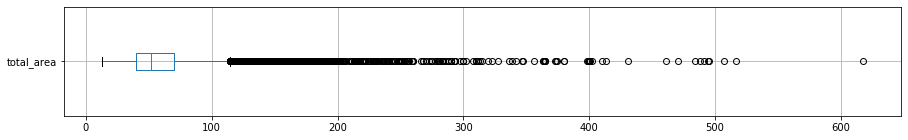

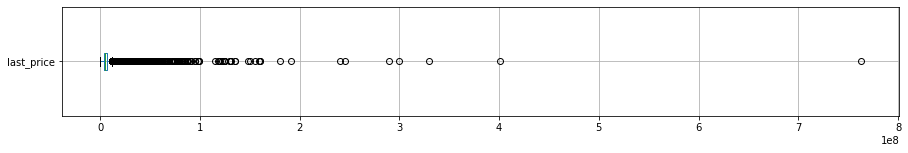

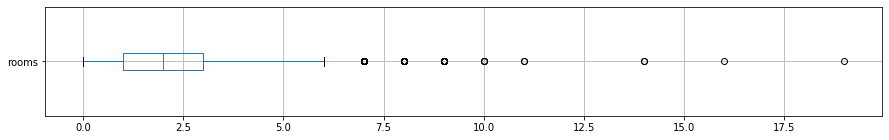

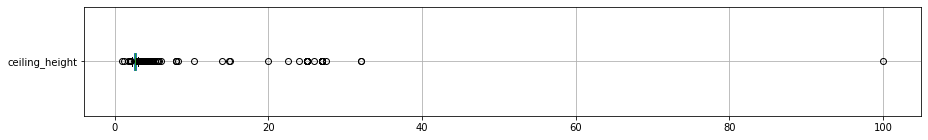

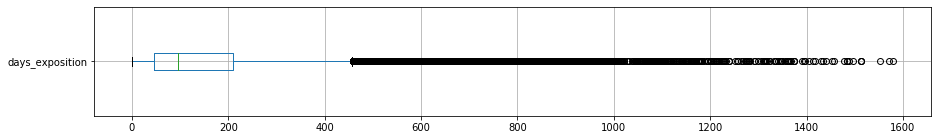

In [72]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height','days_exposition']:
    data.boxplot(column, vert=False, figsize=(15,2), grid=True)
    plt.show()

Из боксплотов видно, что в данных очень много выбросов. Например, высота потолков для некоторых квартир указана как 20 и более метров, что маловероятно. В некоторых квартирах более 17 комнат, а стоимость одной квартиры превышает 70 млн. Эти данные не типичны для наших данных, поэтому стоит их прогнорировать. Попробуем построить гистограммы вышеуказанных столбцов, убрав все выбросы. Сделаем это с помощью высчитывания окончания усов боксплота для каждого столбца (по IQR * 1.5).

In [73]:
data_slice = data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].copy(deep=True) #сделаем копию
cols_with_max = {} # словарь, в котором будут храниться столбцы и их iqr
for column in data_slice:
    iqr = data_slice[column].describe().loc['75%'] - data_slice[column].describe().loc['25%']
    col_max = round(data_slice[column].describe().loc['75%'] + iqr*1.5, 2)
    cols_with_max[column] = col_max

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5795b76610>,
      dtype=object)

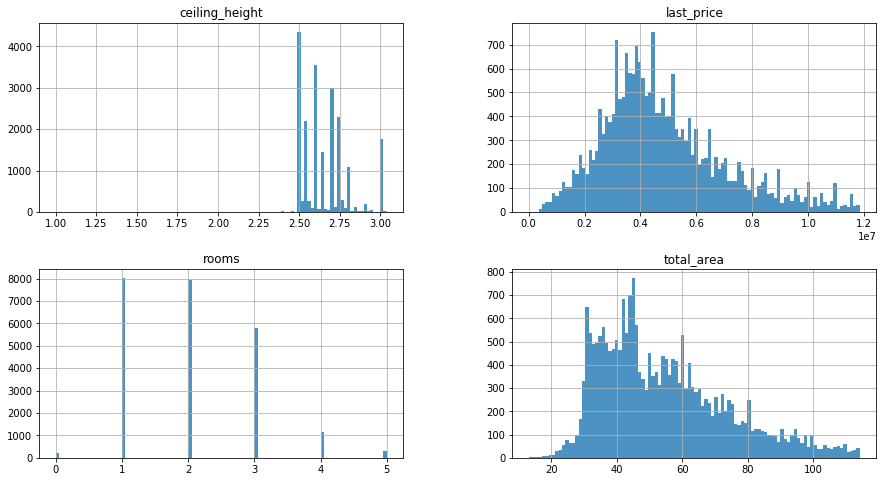

In [74]:
for column in data_slice[['total_area', 'last_price', 'rooms', 'ceiling_height']]:
    data_slice[column].where(data_slice[column] < cols_with_max[column], np.nan, inplace=True) # если значение превышает max,
                                                                                               # ему присваивается NaN
data_slice[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(alpha=0.8, bins=100, figsize=(15,8))

Из полученных гистограмм видим, что высота потолков в представленных квартирах обычно составляет от 2,5 до 3 м.
Квартиры чаще всего стоят от 3 до 5 миллионов.
Больше всего квартир с 1-2 комнатами.
Площадь квартир примерно приходится на 30-50 м.

То же самое сделаем для времени продажи квартиры. Построим ящик с усами.

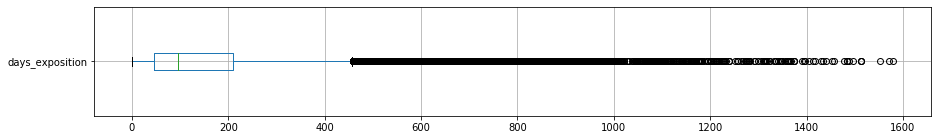

In [75]:
data_slice.boxplot(['days_exposition'], vert=False, figsize=(15,2), grid=True)
plt.show()

Выбросов все также много. Уберем их тем же методом, что и для предыдущих столбцов.

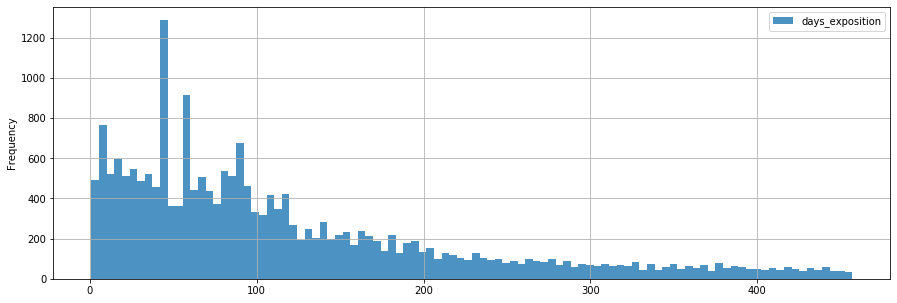

count    21252.000000
mean       120.478590
std        105.781296
min          1.000000
25%         45.000000
50%         87.000000
75%        167.000000
max        457.000000
Name: days_exposition, dtype: float64


In [76]:
data_slice['days_exposition'].where(data_slice['days_exposition'] < cols_with_max['days_exposition'], np.nan, inplace=True)
data_slice['days_exposition'].plot(kind='hist', bins=100, alpha=0.8, grid=True, legend=True, figsize=(15,5))
plt.show()
print(data_slice['days_exposition'].describe())

Исходя из полученной гистограммы, можно заключить, что обычно квартиры продаются в течение 3,5 месяцев (100 дней). Причем чаще всего — в первые 1,5 месяца. Если квартира продается дольше года (более 400 дней), то это уже необычно долго, и, вероятно, квартира какая-то нетипичная.

Теперь изучим, какие факторы влияют на стоимость квартиры. Обратим внимание на площадь, число комнат и удалённость от центра.

In [77]:
data_slice[['rooms', 'cityCenters_nearest']] = data[['rooms', 'cityCenters_nearest']]
for column in ['rooms', 'cityCenters_nearest']:
    iqr = data_slice[column].describe().loc['75%'] - data_slice[column].describe().loc['25%']
    col_max = round(data_slice[column].describe().loc['75%'] + iqr*1.5, 2)
    cols_with_max[column] = col_max

In [78]:
for column in ['rooms', 'cityCenters_nearest']:
    data_slice[column].where(data_slice[column] < cols_with_max[column], np.nan, inplace=True)

total_area 0.681691306220029
rooms 0.3541394907268567
cityCenters_nearest -0.26748705853043914


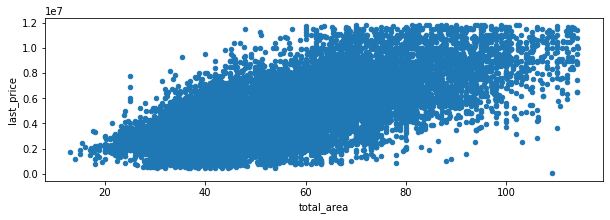

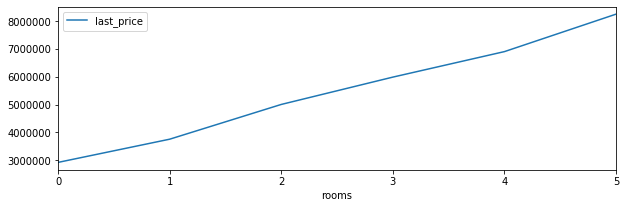

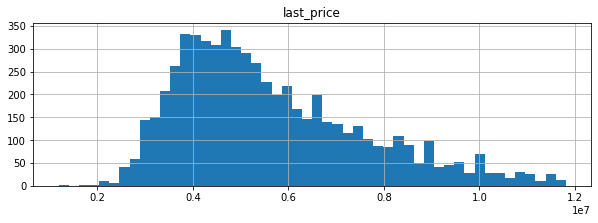

In [79]:
for column in ['total_area', 'rooms', 'cityCenters_nearest']:
    print(column, data['last_price'].corr(data_slice[column]))
data_slice.plot(x='total_area', y='last_price',  kind='scatter', figsize=(10,3))
plt.show()
data_slice.pivot_table(index='rooms', values='last_price').plot(figsize=(10,3))
plt.show()
data_slice.pivot_table(index='cityCenters_nearest', values='last_price').hist(figsize=(10,3), bins=50)
plt.show()

Графики примерно показывают корреляцию. Самую большую корреляцию со стоимостью имеет площадь квартиры, чуть меньшую — количество комнат. Слабую отрицательную корреляцию показывает отдаленность от центра.

Посмотрим, зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.

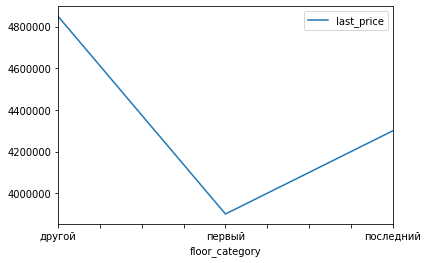

In [80]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot()

По всей видимости, квартиры на первом этаже обычно стоят дешевле других. За ними идут квартиры на последних этажах. Выше всго цена на квартиры между первым и последним этажами.

Теперь посмотрим, зависит ли стоимость от даты объявления.

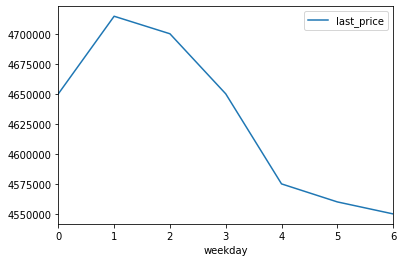

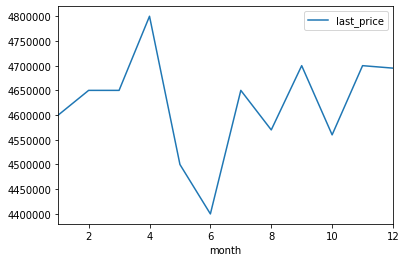

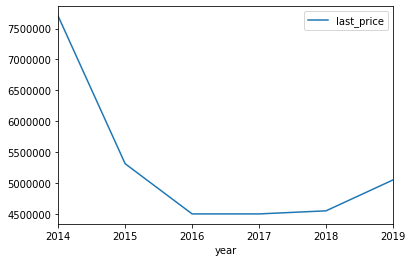

In [81]:
for column in ['weekday', 'month', 'year']:
    data.pivot_table(index=column, values='last_price', aggfunc='median').plot()

Судя по полученным графикам, в понедельник выкладывлись самые дорогие квартиры нашего датасета, а самые дешевые — в субботу. В апреле цена на квартиры была самая высокая, а в июне ниже всего. Стоимость квартир, выставленных на продажу резко упала с 2014 года, а в 2018 начала расти.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [82]:
top_10 = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10).index

In [83]:
mean_ppsq_top_10 = {}
for city in top_10:
    mean_ppsq_top_10[city] = round(data.query('locality_name == @city')['price_per_sq'].mean())

In [84]:
for city in sorted(mean_ppsq_top_10, key=mean_ppsq_top_10.get, reverse=True):
    print(city, mean_ppsq_top_10[city])

Санкт-Петербург 114686
Пушкин 103126
Кудрово 95325
Парголово 90176
Мурино 86088
Шушары 78677
Колпино 75425
Гатчина 68746
Всеволожск 68654
Выборг 58142


Как можно было догадаться, в Питере самые высокие цены на квартиры.

Тогда посмотрим, сильно ли отличаются закономерости для недвижимости в центре Питера от всех остальных данных. Для начала найдем, где заканчиваетя центр Санкт-Петербурга, и какие значения в него входят.
Создадим столбец с расстоянием до центра в километрах.

In [85]:
spb_estate = (data          #выделяем квартиры в Санкт-Петербурге
              .copy(deep=True)
              .query('locality_name == "Санкт-Петербург"')
             )

In [86]:
spb_estate['km_to_center'] = round(spb_estate['cityCenters_nearest'] / 1000)

Теперь посчитаем среднюю цену для каждого километра.

In [87]:
mean_price_per_km = spb_estate.pivot_table(index='km_to_center', values='last_price')

Построим график, на котором будет показано, как цена зависит от удалённости от центра. Там, где график сильно меняется — будет центральная зона.

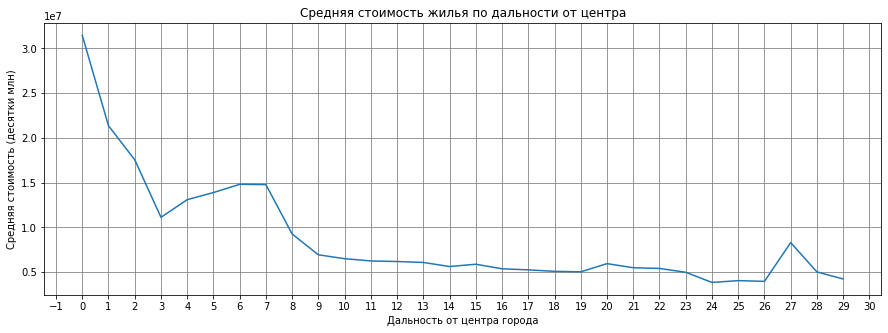

In [88]:
fig, ax = plt.subplots()
ax.plot(mean_price_per_km)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(which='major',
        color = 'gray')
ax.set_xlabel('Дальность от центра города')
ax.set_ylabel('Средняя стоимость (десятки млн)')
ax.set_title('Средняя стоимость жилья по дальности от центра')
fig.set_figwidth(15)
fig.set_figheight(5)

plt.show()

На графике мы видим, что стоимость начинает резко повышатся, начиная с расстояния в 3 км. Соответственно, расстояние от 0 до 3 км можно считать центром города.

Выделим сегмент квартир в центре.

In [89]:
spb_center = spb_estate[spb_estate['km_to_center'] < 3]

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [90]:
spb_cols_with_max = {} # убираем выбросы
for column in spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']]:
    iqr = spb_center[column].describe().loc['75%'] - spb_center[column].describe().loc['25%']
    col_max = round(spb_center[column].describe().loc['75%'] + iqr*1.5, 2)
    spb_cols_with_max[column] = col_max

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5792768fd0>,
      dtype=object)

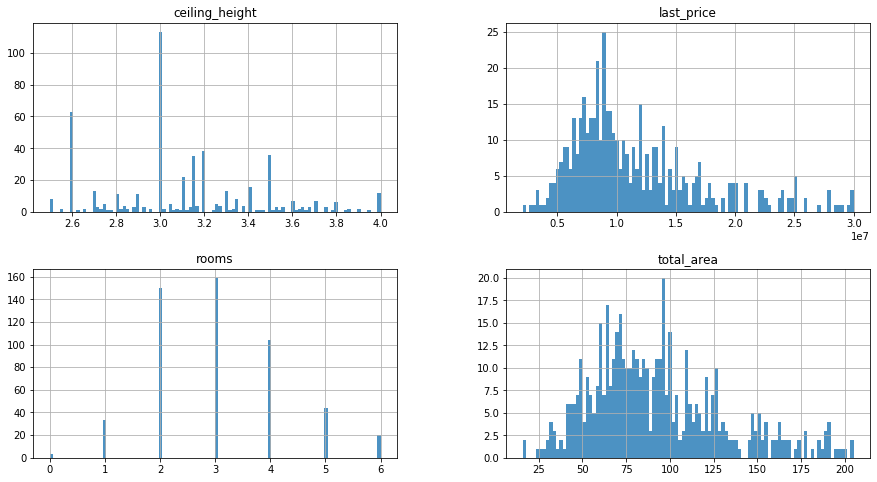

In [91]:
for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    spb_center[column].where(spb_center[column] < spb_cols_with_max[column], np.nan, inplace=True)
spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].hist(alpha=0.8, bins=100, figsize=(15,8))

Из полученных гистограмм видим, что разброс высоты потолков в центре — от 2,5 до 4 м, что больше, чем в общих данных.
Квартиры чаще всего стоят от 5 до 10 миллионов, что также превышает общие данные.
Больше всего квартир с 2-3 комнатами.
Площадь квартир чаще приходится на 50-100 м.
В целом квартиры в центре Питера дороже и больше, чем в среднем по данным.

Рассмотрим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

total_area 0.5909399479863887
rooms 0.3729097292565767
cityCenters_nearest -0.05221056848496083


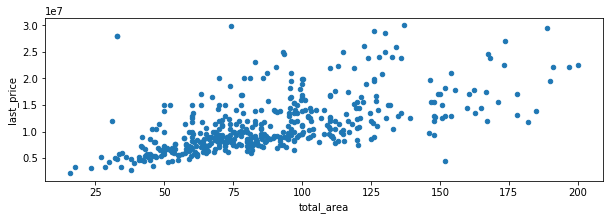

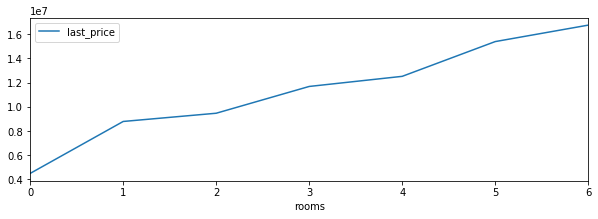

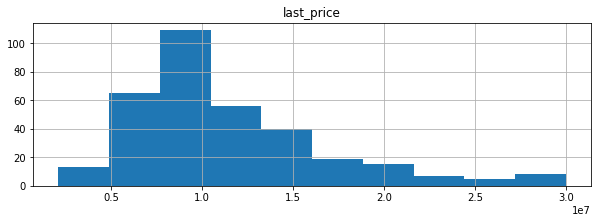

In [92]:
for column in ['total_area', 'rooms', 'cityCenters_nearest']:
    print(column, spb_center['last_price'].corr(spb_center[column]))
spb_center.plot(x='total_area', y='last_price',  kind='scatter', figsize=(10,3))
plt.show()
spb_center.pivot_table(index='rooms', values='last_price').plot(figsize=(10,3))
plt.show()
spb_center.pivot_table(index='cityCenters_nearest', values='last_price').hist(figsize=(10,3))
plt.show()

Корреляция для центра Питера выражена чуть слабее, но с общими данными тренды совпадают. Самую большую корреляцию со стоимостью имеет площадь квартиры, чуть меньшую — количество комнат. Очень слабую отрицательную корреляцию показывает отдаленность от центра. Мы же и так уже в центре :)

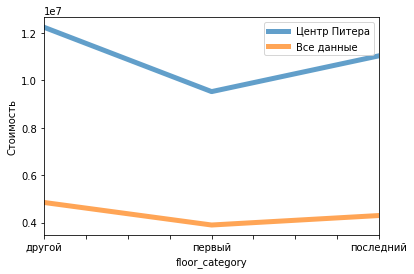

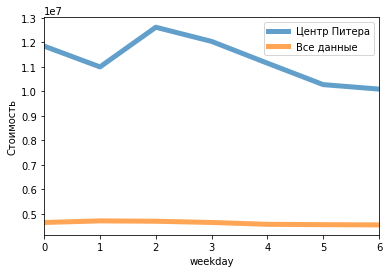

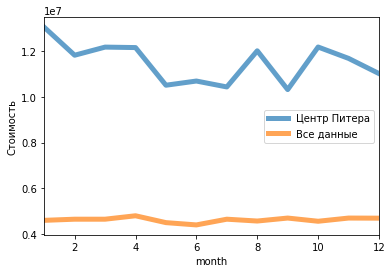

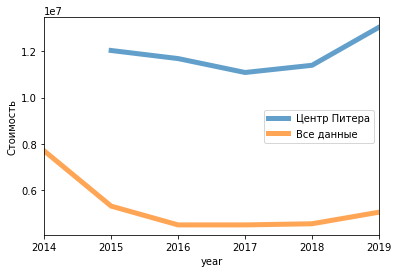

In [93]:
for column in ['floor_category', 'weekday', 'month', 'year']:
    ax = spb_center.pivot_table(index=column, values='last_price').plot(y='last_price', linewidth=5, alpha=0.7, 
                                                                        label='Центр Питера')
    data.pivot_table(index=column, values='last_price', aggfunc='median').plot(y='last_price', linewidth=5, alpha=0.7,
                                                             ax=ax, label='Все данные')
    ax.set_xlabel(column)
    ax.set_ylabel('Стоимость')

Для этажа тренд сохраняется — квартиры на первом этаже самые недорогие.
Судя по полученным графикам, в центре Питера самые дорогие квартиры выкладывлись во сторник и среду, а самые дешевые — в пятницу. В январе цена на квартиры была самая высокая, а в июле ниже всего. Данных за 2014 год по центру Питера нет. С 2017 года цены на квартиры начали расти.

**Итог**

Мы рассмотрели различные факторы, влияющие на стоимость квартир, и выяснили, что тенденции, характерные для квартир в центре Санкт-Петербурга, отличаются от тех, что присущи выборке квартир по всей Ленинградской области. Так, квартиры в центре Санкт-Петербурга обычно имеют большую площадь и стоимость. Тенденции для повышения/понижения стоимости во времени также немного отличаются. Однако, площадь и этаж имеют влияние на стоимость как для центральных, так и для остальных квартир одинаково. 

## Общий вывод

Было проведено исследование объявлений о продаже квартир. Набор данных состоял из информции о площади квартир, этажности домов, расстоянии до центра, высоте потолков и пр., а также указания их стоимости. В наборе были обнаружены пропущенные значения, которые были частично удалены, частично восстановлены, частично проигнорированы. Удалялись записи в столбцах, в которых подавляющее количество пропусков удалось заполнить средними или медианными значениями по сгруппированным строкам. Большое количество пропусков (более 20%) было обнаружено в столбцах с расстоянием до аэропорта и центра города, которые, вероятно, являются ошибкой автоматической системы, заполнявшей их. Эти столбцы были частично восстановлены с помощью средних значений по населенному пункту, остальные пропуски оставлены как есть. Столбцы о парках и прудах были восстановлены на основании друг друга. Столбец с данными о том, является ли квартира апартаментами, был удален в связи с отсутствием 88% значений.

Также в изначальных данных были обнаружены выбросы. Например, объявления о продаже некоторых квартир висели более 1500 дней (более 4 лет). Также, высота потолков для некоторых квартир была указана как 20 и более метров, что маловероятно. В некоторых квартирах было более 17 комнат, а стоимость одной квартиры превышала 70 млн. Эти данные были не типичны для нашего датасета, поэтому в дальнейшем анализе они не рассматривались.

На основании полученных данных были выделены некоторые закономерности — на стоимость квартиры в большей степени влияет площадь, этаж и расстояние от центра города. Обычно квартиры продаются за 3,5 месяца (100 дней). Несмотря на наличие таких общих закономерностей, для квартир в центре Санкт-Петербурга были выявлены отличительные черты. Например, квартиры в центре Питера обычно имеют потолки выше (до 4 м по сравнению с до 3 м), чем квартиры в общей выборке, у них большая площадь (50-100 по сравнению с 30-50) и количество комнат (2-3 вместо 1-2), а также, конечно, выше стоимость (5-10 млн вместо 3-5).

Интересен факт, что по общим данным стоимость квартир начала резкое падение в 2014 году и начала снова расти в 2018 году. Было бы интересно изучить, с чем это может быть связано.